# Algoritmo Mean Shift


Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.


In [4]:
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt

In [3]:
# Generamos las muestras con poca distancia
#centers = [[1, 1], [-1, -1], [1, -1]]
centers = [[0.5, 0.5], [-0.5, -1], [0.5, -1.0]]
O, labels_true = make_blobs(n_samples=750,
                            centers=centers,
                            cluster_std=0.25,
                            random_state=0)

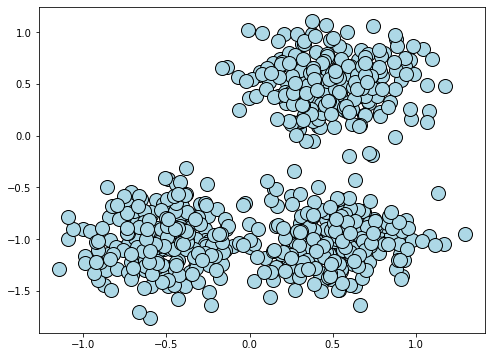

In [72]:
plt.figure(figsize=(8,6))
plt.plot(
   O[:,0],O[:,1],
         'o',
         # markerfacecolor=tuple(col),
         markeredgecolor='k',
         markersize=14,
         color = 'lightBlue',
            )
plt.show()

In [24]:
#escalamos
X = StandardScaler().fit_transform(O)
X

array([[ 0.43822152,  1.4597671 ],
       [-1.40305296, -0.82506651],
       [ 0.25168434,  1.10789211],
       ...,
       [-0.22237816, -0.88668162],
       [-1.09313533, -0.07690061],
       [ 0.16143628, -0.90139337]])

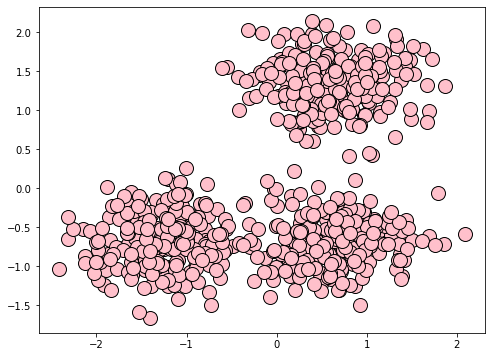

In [35]:
plt.figure(figsize=(8,6))
plt.plot(X[:,0],X[:,1],
         'o',
        #  markerfacecolor=tuple(col),
         markeredgecolor='k',
         markersize=14,
         color = 'pink'
            )
plt.show()

## `estimate_bandwidth` >>> [Link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html)
Estimate the bandwidth to use with the mean-shift algorithm.

In [114]:
# 1. The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X,
                               quantile=0.2,
                               n_samples=500,
                               random_state=0
                               )
print(bandwidth)

0.7095940186621533


## `MeanShift`

In [115]:
# 1. Instanciamos la clase MeanShift usando el bandwith calculado
ms = MeanShift(bandwidth=bandwidth, # If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth
               bin_seeding=True # Setting this option to True will speed up the algorithm because fewer seeds will be initialized
               )

# 2. Entrenamos la clase usando los datos X
ms.fit(X)

MeanShift(bandwidth=0.7095940186621533, bin_seeding=True)

In [116]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('='*100)
print(' MeanShift Training Results '.center(100, '='))

print(f'Estimated number of clusters: {n_clusters_}' )
# print('Estimated number of noise points: %d' % n_noise_)

# HomogenetyScore: each cluster contains only members of a single class.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

# CompletenessScore: all members of a given class are assigned to the same cluster
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

# V_MeasureScore: 
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(O, labels))
print('='*100)
print('='*100)

==================================== MeanShift Training Results ====================================
Estimated number of clusters: 3
Homogeneity: 0.941
Completeness: 0.941
V-measure: 0.941
Adjusted Rand Index: 0.961
Adjusted Mutual Information: 0.941
Silhouette Coefficient: 0.636


## Plot Results

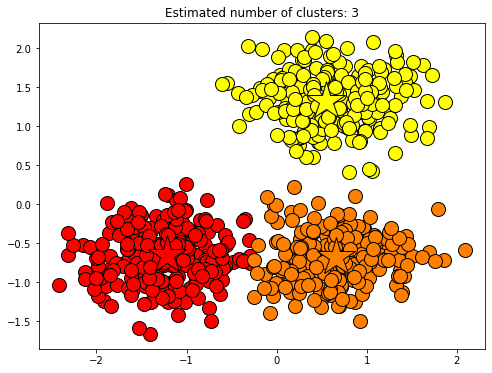

In [117]:
unique_labels = set(labels)

colors = [plt.cm.autumn(each) for each in np.linspace(0,1,len(unique_labels))]
# colors

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    # print(class_member_mask)
    cluster_center = cluster_centers[k]
    
    xy = X[class_member_mask] # Vamos a hacer el gráfico sobre los datos escalados
    # Si lo hicieramos sobre los datos NO escalados (originales) obtendríamos un resultado similar para los clusers
    # solo que la posición del centro de los clusters no coincidiría con el centro gráfico de los datos no escalados
    
    # graficamos los datos con los colores asignados por el modelo
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    # graficamos el centro de los clusters. No entiendo por que el centro de los clusters no coincide con el centro gráfico de cada cluster
    plt.plot(cluster_center[0], cluster_center[1], '*', markerfacecolor=col,
             markeredgecolor='k', markersize=40)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Análisis Adicional
Es necesario el escalado?

## `estimate_bandwidth` >>> [Link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html)
Estimate the bandwidth to use with the mean-shift algorithm.

In [122]:
# 1. The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(O,
                               quantile=0.2,
                               n_samples=500,
                               random_state=0
                               )
print(bandwidth)

0.44509210643677793


## `MeanShift`

In [123]:
# 1. Instanciamos la clase MeanShift usando el bandwith calculado
ms_2 = MeanShift(bandwidth=bandwidth, # If not given, the bandwidth is estimated using sklearn.cluster.estimate_bandwidth
               bin_seeding=True # Setting this option to True will speed up the algorithm because fewer seeds will be initialized
               )

# 2. Entrenamos la clase usando los datos X
ms_2.fit(O)

MeanShift(bandwidth=0.44509210643677793, bin_seeding=True)

In [124]:
labels = ms_2.labels_
cluster_centers = ms_2.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('='*100)
print(' MeanShift Training Results '.center(100, '='))

print(f'Estimated number of clusters: {n_clusters_}' )
# print('Estimated number of noise points: %d' % n_noise_)

# HomogenetyScore: each cluster contains only members of a single class.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

# CompletenessScore: all members of a given class are assigned to the same cluster
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))

# V_MeasureScore: 
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(O, labels))
print('='*100)
print('='*100)

==================================== MeanShift Training Results ====================================
Estimated number of clusters: 3
Homogeneity: 0.941
Completeness: 0.941
V-measure: 0.941
Adjusted Rand Index: 0.961
Adjusted Mutual Information: 0.941
Silhouette Coefficient: 0.636


## Plot Results

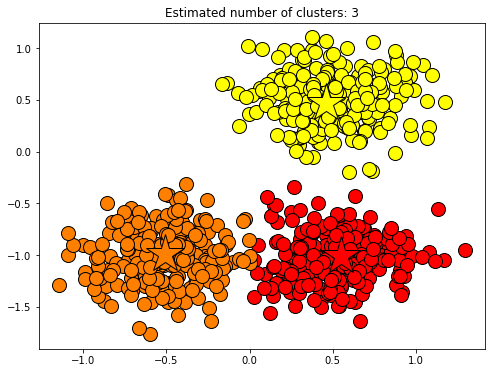

In [125]:
unique_labels = set(labels)

colors = [plt.cm.autumn(each) for each in np.linspace(0,1,len(unique_labels))]
# colors

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    # print(class_member_mask)
    cluster_center = cluster_centers[k]
    
    xy = O[class_member_mask]
    
    # graficamos los datos con los colores asignados por el modelo
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    # graficamos el centro de los clusters.
    plt.plot(cluster_center[0], cluster_center[1], '*', markerfacecolor=col,
             markeredgecolor='k', markersize=40)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Nota: no veo cuál era la necesidad de escalar los datos. Sobre todo en este caso que teníamos solo 2 dimensiones (features).
Tal vez sí sea importante escalar los datos cuando las features son más numerosas.